In [44]:
# Импорт библиотек

In [148]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input
import numpy as np
import seaborn as sns
from skimage.transform import resize

In [48]:
# Загрузка набора данных

In [50]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [52]:
# Определение количества классов

In [54]:
num_classes = len(lfw_people.target_names)

In [56]:
# Извлечение массива изображений

In [58]:
X = lfw_people.images

In [60]:
# Извлечение меток классов

In [62]:
y = lfw_people.target

In [92]:
# Изменение размера изображений до 32x32 и добавление размерности канала(градации серого)

In [98]:
X_resized = np.array([resize(image, (32, 32), anti_aliasing=True) for image in X])
X_resized = np.expand_dims(X_resized, axis=-1)

In [106]:
# Преобразование данных к типу float32

In [108]:
X_resized = X_resized.astype('float32')

In [166]:
# Разделение данных на обучающую и тестовую выборки

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resized, y, test_size=0.2, random_state=42, stratify=y
)

In [112]:
# Инициализация модели

In [114]:
network = models.Sequential()

In [116]:
# Добавление слоёв (свёрточный -> пулинговый -> свёрточный -> пулинговый)

In [118]:
network.add(Input(shape=(32, 32, 1)))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

In [120]:
# Добавление слоя Flatten(конвертация данных в меньшую размерность), а также полносвязного и выходного полносвязного слоёв

In [122]:
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(num_classes, activation='softmax'))

In [124]:
# Вывод архитектуры модели

In [126]:
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,791 (651.53 KB)

 Trainable params: 166,791 (651.53 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
# Компиляция модели

In [130]:
network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [132]:
# Обучение модели

In [134]:
history = network.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3653 - loss: 1.7819 - val_accuracy: 0.4109 - val_loss: 1.6715
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4221 - loss: 1.6500 - val_accuracy: 0.4109 - val_loss: 1.6253
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4141 - loss: 1.6217 - val_accuracy: 0.4302 - val_loss: 1.4974
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4486 - loss: 1.5101 - val_accuracy: 0.4612 - val_loss: 1.3715
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5416 - loss: 1.2843 - val_accuracy: 0.5194 - val_loss: 1.2133
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6050 - loss: 1.1296 - val_accuracy: 0.6279 - val_loss: 1.0535
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7086 - loss: 0.9442 - val_accuracy: 0.6977 - val_loss: 0.9028
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7079 - loss: 0.8613 - val_accuracy: 0.7093 - v

In [136]:
# Предсказания модели

In [138]:
y_pred_probs = network.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [140]:
# Вывод отчёта о классификации (метрики оценки качества такие, как точность, полнота, F1-мера)

In [142]:
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.75      0.75        16
     Colin Powell       0.95      0.85      0.90        47
  Donald Rumsfeld       0.76      0.79      0.78        24
    George W Bush       0.94      0.93      0.94       106
Gerhard Schroeder       0.75      0.82      0.78        22
      Hugo Chavez       0.76      0.93      0.84        14
       Tony Blair       0.83      0.83      0.83        29

         accuracy                           0.87       258
        macro avg       0.82      0.84      0.83       258
     weighted avg       0.88      0.87      0.87       258



In [144]:
# Дополнительный вывод точности

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2%}")

Точность модели: 87.21%


In [152]:
# Матрица ошибок

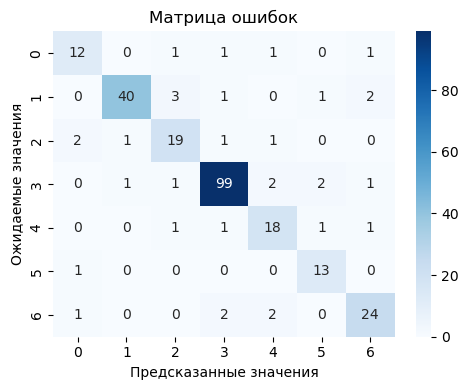

In [156]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные значения")
plt.ylabel("Ожидаемые значения")
plt.tight_layout()
plt.show()

In [158]:
# График точности модели на тренировочных и тестовых данных

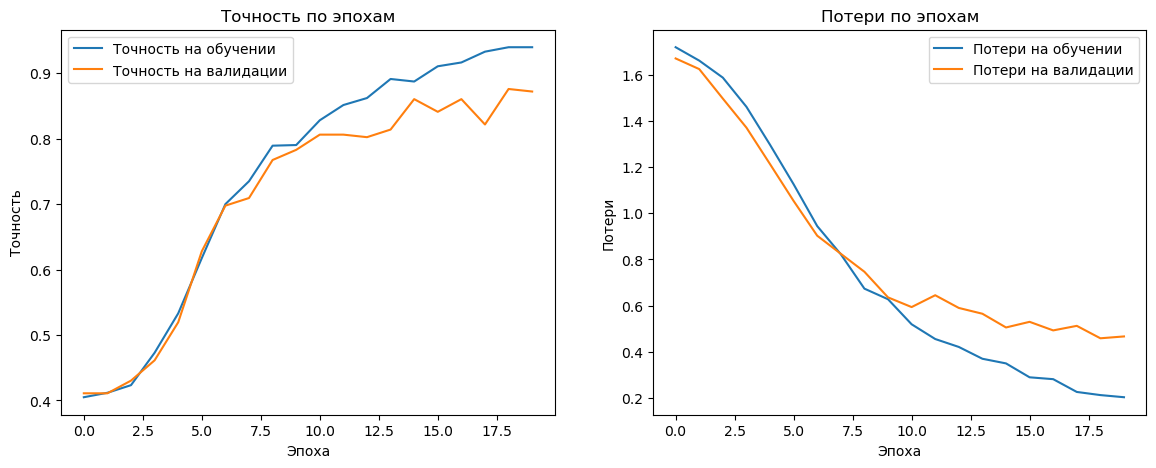

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# График точности
ax[0].plot(history.history['accuracy'], label='Точность на обучении')
ax[0].plot(history.history['val_accuracy'], label='Точность на валидации')
ax[0].set_title('Точность по эпохам')
ax[0].set_xlabel('Эпоха')
ax[0].set_ylabel('Точность')
ax[0].legend()
# График потерь
ax[1].plot(history.history['loss'], label='Потери на обучении')
ax[1].plot(history.history['val_loss'], label='Потери на валидации')
ax[1].set_title('Потери по эпохам')
ax[1].set_xlabel('Эпоха')
ax[1].set_ylabel('Потери')
ax[1].legend()